In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/shaze/Desktop/cleaning/alldata.csv')

In [4]:
import seaborn as sns

In [ ]:
#  1. Data Overview
# First thing I did was have a look at the data to get a feel for how it's presented as well as to spot
# any initial glaring problems.

In [6]:
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [7]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [8]:
df.tail()

,position,company,description,reviews,location
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"
6963,"Principal Data Scientist, Deep Learning",Comcast,Comcast’s Technology &amp; Product organizatio...,11610.0,"Sunnyvale, CA 94089"


In [9]:
df.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [ ]:
# 2. Remove nulls
# After running df.head() I saw straight away that the review column has a few nulls.
# I plotted these as a heatmap to see how many there were.

<Axes: >

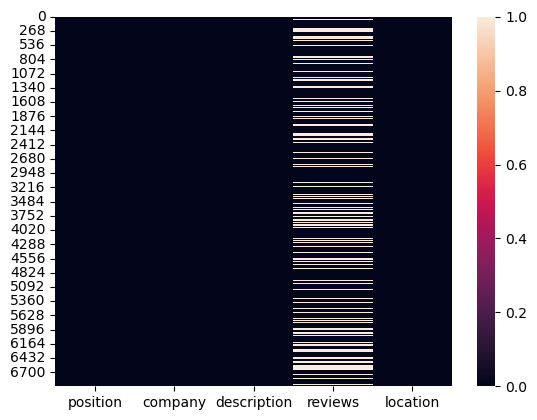

In [12]:
cols = df.columns
sns.heatmap(df[cols].isnull())

In [ ]:
# 2a
# If I wanted I could just drop all the nulls from reviews (and locations, just for the fun of it)
# and then I ran a sum of the isnull's to confirm.

In [20]:
dropped_rows = df.dropna(subset=['reviews','location'])

In [21]:
print(dropped_rows['reviews'].isnull().sum())

0


In [ ]:
# 2b
# If I wanted to I could have dropped the entire reviews column.

In [22]:
df_dropped = df.drop(['reviews'],axis=1)

In [23]:
df_dropped.columns

Index(['position', 'company', 'description', 'location'], dtype='object')

In [ ]:
# 3
# Instead of the two options above, I replaced all of the null values in the reviews column with 0

In [24]:
df.reviews = df.reviews.fillna(0)

In [25]:
df.reviews.head()

0      0.0
1      0.0
2      0.0
3     44.0
4    550.0
Name: reviews, dtype: float64

In [ ]:
# 4. Removing anomalies
# I plotted reviews to see if there was any outliers. There was so I applied a cut that removed anything with
# reviews over 60,000.

<Axes: xlabel='reviews'>

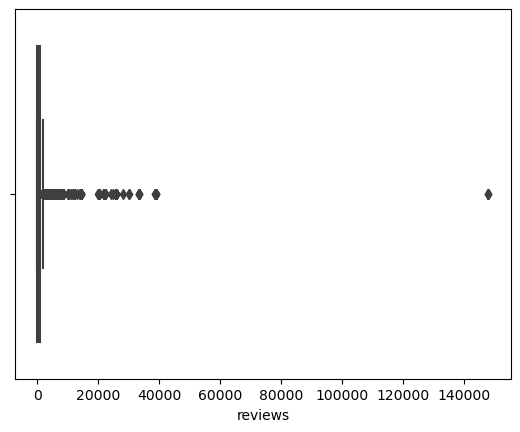

In [26]:
sns.boxplot(x=df.reviews)

In [27]:
df = df[df['reviews'] < 60000]

In [28]:
df.describe()

,reviews
count,6959.000000
mean,2326.677827
std,6417.707014
min,0.000000
25%,2.000000
50%,79.000000
75%,705.000000
max,38844.000000


In [ ]:
# 5. Cleaning
# I removed all duplicates from the file. I then made all letters lowercase, removed any numbers and stripped the spaces

In [29]:
df = df.drop_duplicates()
#this removes rows where the entire row is duplicated in the file

In [30]:
df.describe()

,reviews
count,6949.000000
mean,2330.026047
std,6421.716252
min,0.000000
25%,2.000000
50%,82.000000
75%,705.000000
max,38844.000000


In [37]:
df.location.head()

0    atlanta, ga
1    atlanta, ga
2    atlanta, ga
3    atlanta, ga
4    atlanta, ga
Name: location, dtype: object

In [32]:
df.location = df.location.str.lower()

In [34]:
df.location = df.location.str.replace('\d+','')
#\d means all digits, + means more than 1.

C:\Users\shaze\AppData\Local\Temp\ipykernel_62128\549832446.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.location = df.location.str.replace('\d+','')


In [36]:
df.location = df.location.str.strip()